In [1]:
#pip install yfinance

In [2]:
import pandas as pd
import yfinance as yfin
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### *DATA OF NVIDIA FROM 2018 TO 2024 EXTRACTED FROM YAHOO FINANCE*

In [3]:
start = '2018-01-01'
end = '2024-01-01'
nvidia_1 = yfin.download('NVDA', start,end)
nvidia_1
print(nvidia_1.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2018-01-02  48.945000  49.875000  48.625000  49.837502  49.312790  35561600
2018-01-03  51.025002  53.424999  50.937500  53.117500  52.558258  91470400
2018-01-04  53.939999  54.512501  53.172501  53.397499  52.835300  58326800
2018-01-05  53.547501  54.227501  52.770000  53.849998  53.283035  58012400
2018-01-08  55.099998  56.250000  54.645000  55.500000  54.915676  88121600


In [4]:
nvidia_1 = nvidia_1.to_csv('assignment_1.csv')

In [5]:
# data is saved

In [6]:
nvidia = pd.read_csv('assignment_2.csv',index_col=0,parse_dates=True)

In [7]:
nvidia = pd.DataFrame(nvidia['Adj Close'])

In [8]:
nvdAdj=nvidia['Adj Close']

In [9]:
# information of the adjusted close column

In [10]:
nvdAdj.describe()

count    1509.000000
mean      157.330304
std       122.343514
min        31.523222
25%        59.654930
50%       131.218185
75%       212.323395
max       504.045685
Name: Adj Close, dtype: float64

### THE VIZ OF THE NVDA AJUSTED CLOSE PRICES

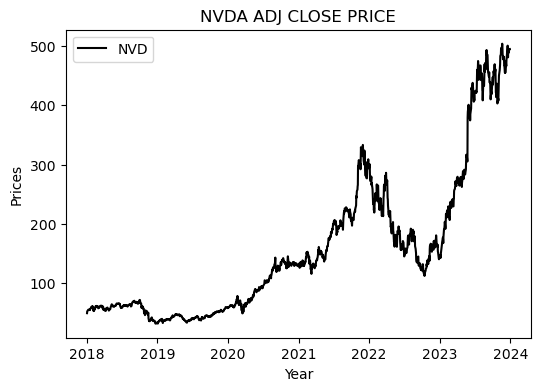

In [11]:
fig, ax = plt.subplots(figsize = (6, 4)) 
ax.plot(nvdAdj, label ='NVD',color='black') 
ax.set_xlabel('Year') 
ax.set_ylabel('Prices')
plt.title('NVDA ADJ CLOSE PRICE')
plt.legend()

In [12]:
retNVD = np.log(nvdAdj).diff().dropna()

In [13]:
# returns of nvidia

In [14]:
pd.DataFrame(retNVD)

,Adj Close
Date,
2018-01-03,0.063739
2018-01-04,0.005258
2018-01-05,0.008438
2018-01-08,0.030181
2018-01-09,-0.000270
...,...
2023-12-22,-0.003271
2023-12-26,0.009153
2023-12-27,0.002796


In [15]:
retNVD.describe()

count    1508.000000
mean        0.001530
std         0.032346
min        -0.207712
25%        -0.015269
50%         0.002630
75%         0.019258
max         0.218088
Name: Adj Close, dtype: float64

In [16]:
# visulisation of the returns of nvidia

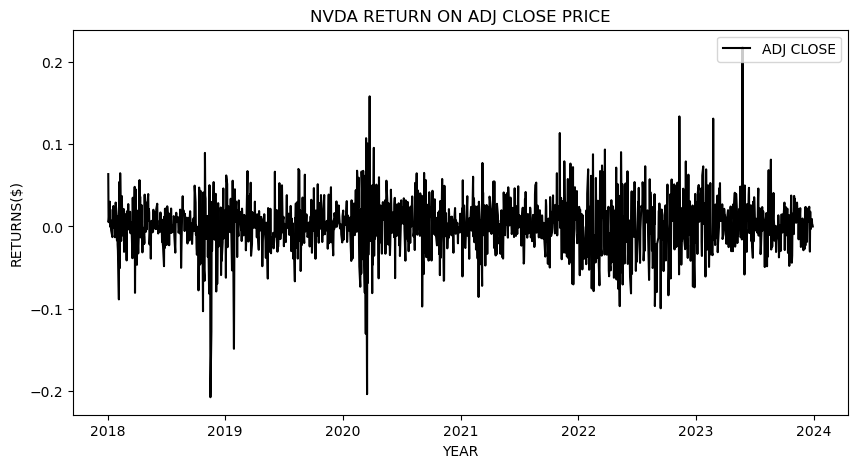

In [17]:
plt.figure(figsize=(10,5))
plt.xlabel('YEAR')
plt.ylabel('RETURNS($)')
plt.title('NVDA RETURN ON ADJ CLOSE PRICE')
plt.plot(retNVD,label ='ADJ CLOSE',color = 'black',linestyle = '-')
plt.legend(loc= 'upper right');

In [18]:
# checking for stationarity

In [19]:
mean_value = retNVD.mean()
std_dev = retNVD.std()
threshold = 0.1
if abs(mean_value - mean_value) < threshold and abs(std_dev - std_dev) < threshold:
    print('The return is stationary because its mean and standard deviation do not change significantly over time.')
else:
    print('The return is not stationary.')


The return is stationary because its mean and standard deviation do not change significantly over time.


## *CHECKING FOR THE SKEWNESS,MEAN,STD.V AND KURTOSIS OF THE RETURNS*

In [20]:
mean_value = retNVD.mean()
standv = retNVD.std()
skewness = retNVD.skew()
kurt = retNVD.kurtosis()
mean_value_formatted = round(mean_value, 4)
standv_formatted = round(standv, 4)
skewness_formatted = round(skewness, 4)
kurt_formatted = round(kurt, 4)
skewness_direction = 'right' if skewness > 0 else 'left' if skewness < 0 else 'symmetric'
print(f'The mean of the return is: {mean_value_formatted}')
print(f'The standard deviation of the return is: {standv_formatted}')
print(f'The skewness of the return is: {skewness_formatted} (skewed to the {skewness_direction})')
print(f'The kurtosis of the return is: {kurt_formatted}')


The mean of the return is: 0.0015
The standard deviation of the return is: 0.0323
The skewness of the return is: -0.2044 (skewed to the left)
The kurtosis of the return is: 4.7166


## HISTOGRAM OF THE RETURNS THAT SHOWS THE  MEAN AND THE DENSITY AS WELL AS THE STD.V

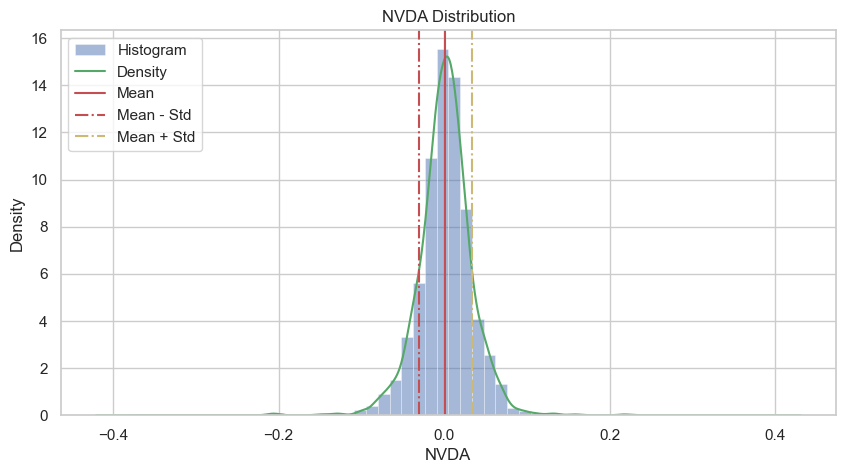

In [21]:
sns.set(style="whitegrid")
mean_value = round(retNVD.mean(), 4)
standv = round(retNVD.std(), 4)
plt.figure(figsize=(10, 5))
plt.hist(retNVD, bins=30, density=True, linewidth=0.5, edgecolor='white', color='b', alpha=0.5, label='Histogram')
retNVD.plot.density(color='g', linestyle='solid', label='Density')
plt.axvline(mean_value, color='r', linestyle='solid', label='Mean')
plt.axvline(mean_value - standv, color='r', linestyle='dashdot', label='Mean - Std')
plt.axvline(mean_value + standv, color='y', linestyle='dashdot', label='Mean + Std')
plt.xlabel('NVDA')
plt.title('NVDA Distribution')
plt.legend(loc='upper left')
plt.show()